## Imports

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers

In [3]:
import matplotlib.pyplot as plt

## Initialize

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model

In [5]:
inputs = keras.Input(shape=(10,))
x = layers.Dense(10, activation='linear')(inputs)

x = layers.Dense(7*7*8, activation='relu')(inputs)
x = layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='output')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [6]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_1 (Dense)             (None, 392)               4312      
                                                                 
 reshape (Reshape)           (None, 7, 7, 8)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       12864     
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       51232 

## Train

In [548]:
model.fit(y_train, x_train, batch_size=64, epochs=1)

938/938 [==============================] - 284s 298ms/step - loss: 0.0585 - accuracy: 0.7877


## Test

1/1 [==============================] - 0s 321ms/step


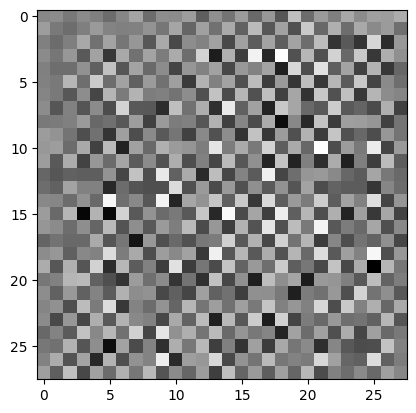

1/1 [==============================] - 0s 43ms/step


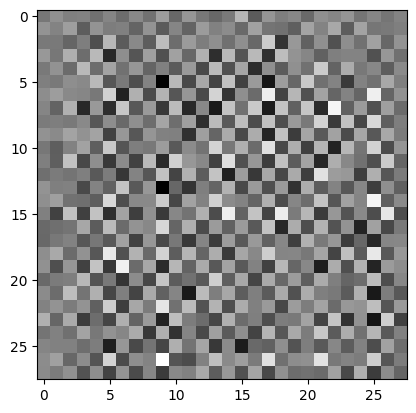

1/1 [==============================] - 0s 52ms/step


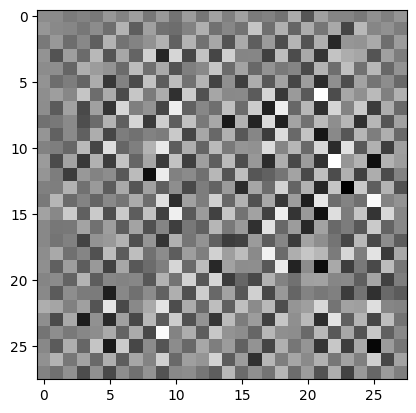

1/1 [==============================] - 0s 46ms/step


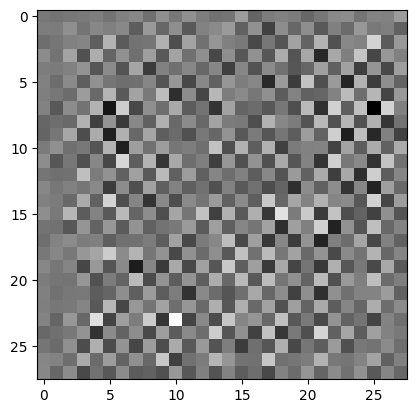

1/1 [==============================] - 0s 36ms/step


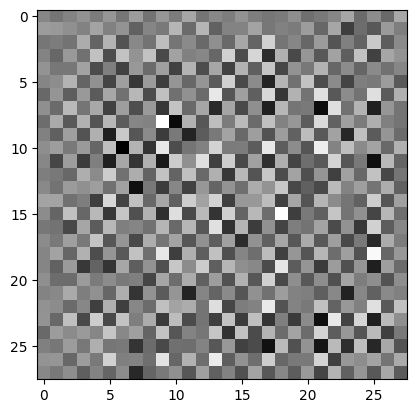

1/1 [==============================] - 0s 44ms/step


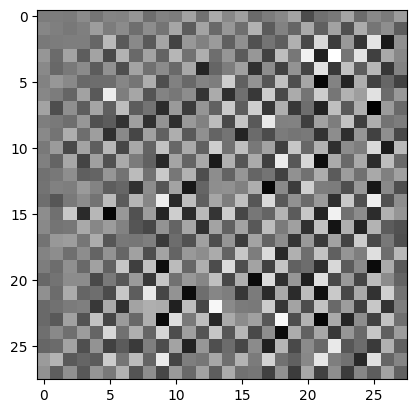

1/1 [==============================] - 0s 29ms/step


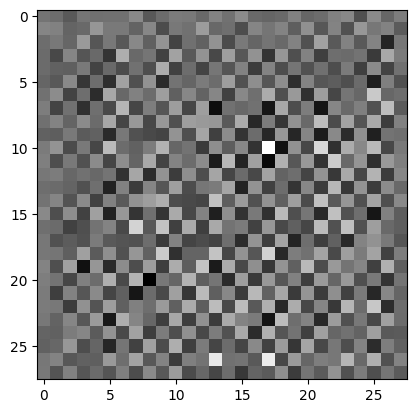

1/1 [==============================] - 0s 36ms/step


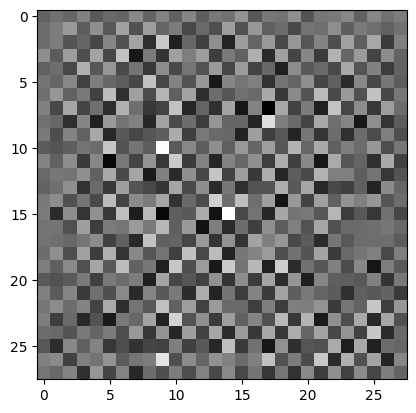

1/1 [==============================] - 0s 46ms/step


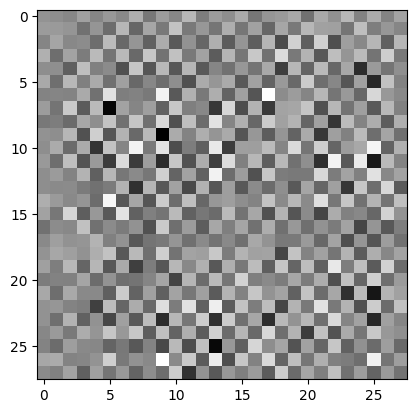

1/1 [==============================] - 0s 30ms/step


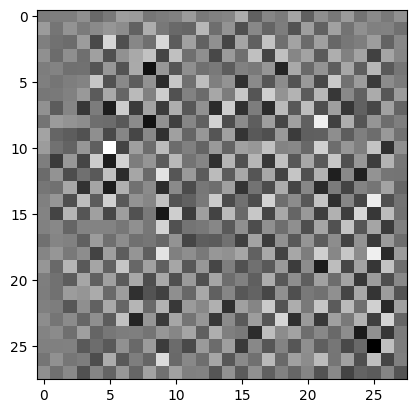

In [8]:
for i in range(10):
    p = model.predict(tf.expand_dims(to_categorical(i, 10), axis=0))
    plt.imshow(p[0].squeeze(), cmap='gray')
    plt.show()